**EmoSense**

Understanding Group Emotions through Individual Facial Analysis

##Business Problem

The business problem revolves around the need to gauge and understand the collective mood of groups during events like company retreats, school assemblies, or community gatherings.
    
The goal is to develop a system that can analyze group images to identify and interpret the emotions of individuals within those images. By using deep learning models and algorithms, the system aims to detect emotions such as happiness, enthusiasm, or apprehension.
    
This tool would provide valuable insights for businesses, educators, and event organizers to assess and enhance group engagement, satisfaction, and overall experience, ultimately fostering better social dynamics and productivity.

## Existing Solution and Limitations

Existing solutions for understanding group emotions from images face several challenges.

Traditional methods often assume the entire group shares the same emotion, overlooking individual differences.

Accurately analyzing group pictures requires identifying emotions from both the group as a whole and each person's face, which can be difficult due to varying lighting, facial expressions, and the subtlety of emotions.

Additionally, capturing these emotions quickly and accurately is crucial for applications like event management and customer interactions, but current methods struggle to meet these demands.

# Proposed Solution

This project aims to redefine the way we perceive and interpret group emotions by implementing an approach that takes into account the individual emotions within a group.

Instead of solely analyzing group images as a whole, our solution involves employing deep learning models to extract emotions of individuals given group images.

We strive to create a comprehensive understanding of group emotions that captures the rich diversity of feelings present among group members.

# Deep Learning Problem

We aim to create a pipeline using algorithms or pretrained deep learning models to extract human faces in group images and then identify emotions of each human face.

Technically, this is a face detection and classification problem.


# Technical Objectives
-----------------------------------------------------------------

# Face Detection and Extraction

Given an image of a group of people, extract and isolate faces of individual people in the image.

Use pretrained models such as YOLOv8, YOLOv8 Face, Single-Shot Multibox Detector (SSD)(https://github.com/code-cse/Face-Detection-SSD) , or non-ML algorithmic techniques such as HaarCascade(https://pyimagesearch.com/2021/04/12/opencv-haar-cascades/) to extract these individual faces.

YOLOv8:  https://github.com/ultralytics/ultralytics

YOLOv8 face: https://github.com/derronqi/yolov8-face

# Emotion Classification



Once the individual faces have been extracted, identify the emotion of each of the faces in the given image.

Use techniques such as majority voting to identify the emotion of the entire group.

Use Facial Attribute Analysis from DeepFace library to analyze individual emotions.
https://www.youtube.com/watch?v=GT2UeN85BdA  from https://github.com/serengil/deepface  library



Note: Feel free to explore other Facial Emotion Recognition models.

""" Additonal note: (Using the extracted faces, classify their emotions using deep learning models or pre-trained models like DeepFace, Facial Expression Recognition (FER), or Facial Landmark Detection (FLD).

DeepFace: https://github.com/serengil/deepface

FER: https://github.com/divamgupta/facenet-pytorch) """

# Labeling, Validation and Evaluation

To enable performance validation of the pipeline, we have scrapped about 3000 group images from the internet.
Download the images from here.(https://drive.google.com/file/d/17UoqIa5vzUVglQccnSDtA3w6ZYggrHRh/view)

Label all or a subset of images manually for faces and emotions of each of the faces.

You can use a tool such as Label Studio for the same. If you choose to label a subset of images, ensure that there is a diversity in the kind of images you include in your subset.

Use the labeled images to validate the performance of your solution. Benchmark your solution for latency, as well as against statistical metrics such as Intersection of Union (IoU), Accuracy, Precision, Recall etc.


DeepFace library comes with support for both - face detection/extraction and Emotion Recognition. However, since it comes with a plethora of models and options (called backends), you need to weigh in the tradeoff between statistical performance and scalability. Explore as many options as you can to ensure that your analysis and solution are comprehensive.

Also, consider exploring Super Resolution techniques for improving image quality.


## STEP BY STEP approach to solve the problem

1) STEP 1: Install Necessary Packages and Libraries

2) STEP 2: Perform Face detection and extraction using Yolov8m Model

3) STEP3:Perform Prediction of face Emotion Classiifcation using Deep Face model


4) STEP4:  Perform EDA and Visualization( evaluation of Confidence Scores)

5) STEP5: USE SUPER RESOLUTION TECHNIQUE for Reclaibration of Extracted Faces

6) STEP6: USE Face EMotion classification on ENhanced faces

7) STEP6: EVALUATION : compariosn of evaluation scores on emotions before and after Super resolution






## STEP 1: Install Necessary Packages and Libraries

In [2]:
# install necessary packages
!pip install -Uq ultralytics
!pip install -Uq deepface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.0 MB/s eta 0:00:00


In [3]:
# import necessaey packages
import cv2
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import torch
from ultralytics import YOLO
from PIL import Image
from deepface import DeepFace
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
import time
from sklearn.metrics import classification_report

24-08-30 08:42:57 - Directory /root/.deepface has been created
24-08-30 08:42:57 - Directory /root/.deepface/weights has been created


In [ ]:
# # initialize path for the image directory
# image_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/GroupEmotion"
# # get all the images
# all_images = os.listdir(image_directory)
# #randomly selected for 100 images
# selected_images = random.sample(all_images, 5)


In [ ]:
# image_bame = selected_images[2]
# print(image_bame)
# image_path = os.path.join(image_directory, image_bame)
# print(image_path)

56_Voter_peoplevoting_56_158.jpg
/content/drive/MyDrive/IK_CV2_PROJECT/GroupEmotion/56_Voter_peoplevoting_56_158.jpg


Image path:  /content/drive/MyDrive/IK_CV2_PROJECT/GroupEmotion/56_Voter_peoplevoting_56_158.jpg


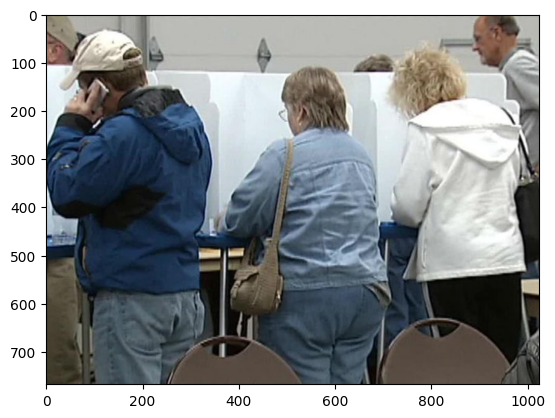

In [ ]:
# # check if the file exists and print the image
# if os.path.exists(image_path):
#     print("Image path: ", image_path)
#     image = cv2.imread(image_path) # load the image

#     #check if image is not loaded successfully
#     if image is not None:
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         plt.imshow(image)
#         plt.show()
#     else:
#         print("Couldn't load Image successfully")
# else:
#     print("Image not found")


In [ ]:
# test_image = cv2.imread('/content/drive/MyDrive/IK_CV2_PROJECT/GroupEmotion/56_Voter_peoplevoting_56_158.jpg')
# test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
# bounding_boxes = detect_faces(test_image_rgb, model, conf_threshold=0.15)
# if len(bounding_boxes) > 0:
#     img_with_boxes = draw_boxes(test_image_rgb.copy(), bounding_boxes)
#     plt.imshow(img_with_boxes)
#     plt.show()
# else:
#     print("No faces detected in the test image.")



0: 640x640 (no detections), 1195.2ms
Speed: 14.3ms preprocess, 1195.2ms inference, 20.7ms postprocess per image at shape (1, 3, 640, 640)
No faces detected in the test image.


In [ ]:
# def detect_faces_without_preprocessing(image, model, conf_threshold=0.15):
#     img_resized = cv2.resize(image, (640, 640))  # Resize to 640x640
#     results = model(img_resized, conf=conf_threshold)
#     bounding_boxes = results[0].boxes.xyxy.cpu().numpy() if results[0].boxes is not None else []
#     return bounding_boxes


In [ ]:
# # Create an ImageDataGenerator for preprocessing & augmentation
# datagen = ImageDataGenerator(
#     rescale=1./255,  # Normalize pixel value between 0 and 1
#     rotation_range=20,  # Randomly rotate image by 20 degrees
#     width_shift_range=0.2,  # Shift image horizontally by 20% of the width
#     height_shift_range=0.2,  # Shift image vertically by 20% of the height
#     shear_range=0.2,  # Shear image by 20%
#     zoom_range=0.2,  # Zoom image by 20%
#     horizontal_flip=True,
#     fill_mode='nearest'  # Fill any missing pixels with the nearest value
# )

# # Load and preprocess the selected images
# def load_and_preprocess_selected_images(image_directory, selected_images, target_size=(640, 640)):
#     processed_images = []
#     for image_name in selected_images:
#         image_path = os.path.join(image_directory, image_name)
#         image = load_img(image_path, target_size=target_size)  # Load and resize image
#         image = img_to_array(image)  # Convert image to array
#         processed_images.append(image / 255.0)  # Normalize
#     return processed_images

# # Load processed images
# processed_images = load_and_preprocess_selected_images(image_directory, selected_images)


In [19]:
#processed_images = load_and_preprocess_selected_images(image_directory, selected_images)

In [20]:
#print(processed_images[0])

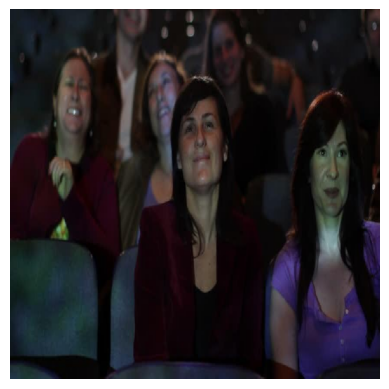

In [ ]:
# # # Display the first processed image
# plt.imshow(processed_images[0])
# plt.axis('off')  # Hide the axes
# plt.show()

In [ ]:
# # Initialize path for the image directory
# image_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/GroupEmotion"
# # Get all the images
# all_images = os.listdir(image_directory)
# # Randomly select 50 images
# selected_images = random.sample(all_images, 500)

# # Load a pre-trained YOLO face model
# model = YOLO('/content/drive/MyDrive/IK_CV2_PROJECT/PTModel/yolov8n-face.pt')

# def load_and_preprocess_selected_images(image_directory, selected_images):
#     processed_images = []
#     for image_name in selected_images:
#         image_path = os.path.join(image_directory, image_name)
#         image = load_img(image_path, target_size=(640, 640))  # Resize image for consistency
#         image = img_to_array(image)  # Convert image to array
#         processed_images.append(image)
#     return processed_images

# # Load processed images
# processed_images = load_and_preprocess_selected_images(image_directory, selected_images)

# def detect_faces(image, conf_threshold=0.25):
#     """
#     Detect faces in an image using YOLO face detection.
#     :param image: preprocessed image in numpy array format
#     :return: List of bounding boxes for detected faces
#     """
#     # Perform face detection
#     results = model(image, conf=conf_threshold)
#     bounding_boxes = results[0].boxes.xyxy.cpu().numpy() if len(results) > 0 else []
#     return bounding_boxes

# # Process the images to detect faces and draw bounding boxes
# for i, img in enumerate(processed_images):
#     print(f"Processing image {i + 1}/{len(processed_images)}")

#     # Convert image to BGR format for YOLO
#     img_yolo = img  # No need to convert from RGB if already in proper format

#     # Perform face detection
#     bounding_boxes = detect_faces(img_yolo)

#     print(f"Number of faces detected: {len(bounding_boxes)}")

#     # Draw bounding boxes on the image
#     img_with_boxes = img_yolo.copy()  # Copy image to draw on
#     for box in bounding_boxes:
#         x1, y1, x2, y2 = box[:4]  # Coordinates
#         cv2.rectangle(img_with_boxes, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Draw rectangle

#     # Convert back to RGB for displaying with matplotlib
#     img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

#     # Normalize to [0, 1] for proper display with matplotlib
#     img_with_boxes = img_with_boxes.astype(np.float32) / 255.0

#     # Display the image with bounding boxes
#     plt.figure(figsize=(10, 10))  # Set figure size for better visibility
#     plt.imshow(img_with_boxes)
#     plt.title(f'Image {i + 1} with Detected Faces')
#     plt.axis('off')
#     plt.show()

# #---------------------------------------------------------------------------#

# # # Load and preprocess the selected images without augmentation for inference
# # def load_and_preprocess_selected_images(image_directory, selected_images):
# #     processed_images = []
# #     for image_name in selected_images:
# #         image_path = os.path.join(image_directory, image_name)
# #         image = load_img(image_path)  # Load image without resizing
# #         image = img_to_array(image)  # Convert image to array
# #         processed_images.append(image)  # Keep original size
# #     return processed_images

# # # Load processed images
# # processed_images = load_and_preprocess_selected_images(image_directory, selected_images)

# # def detect_faces(image, conf_threshold=0.25):
# #     """
# #     Detect faces in an image using YOLO face detection.
# #     :param image: preprocessed image in numpy array format
# #     :return: List of bounding boxes for detected faces
# #     """
# #     # Perform face detection
# #     results = model(image, conf=conf_threshold)
# #     bounding_boxes = results[0].boxes.xyxy.cpu().numpy() if len(results) > 0 else []
# #     return bounding_boxes

# # # Process the images to detect faces
# # detected_faces = []

# # for i, img in enumerate(processed_images):
# #     print(f"Processing image {i + 1}/{len(processed_images)}")

# #     # Convert image to BGR format for YOLO
# #     img_yolo = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert to BGR format

# #     # Perform face detection
# #     bounding_boxes = detect_faces(img_yolo)

# #     print(f"Number of faces detected: {len(bounding_boxes)}")

# #     # Extract each face using bounding box
# #     for box in bounding_boxes:
# #         x1, y1, x2, y2 = box[:4]  # Coordinates
# #         face = img[int(y1):int(y2), int(x1):int(x2)]  # Crop the face from the image
# #         detected_faces.append(face)

# # # Optionally visualize the detected faces
# # if detected_faces:
# #     for i, face in enumerate(detected_faces):
# #         plt.imshow(face.astype(np.uint8))  # Ensure the face is in uint8 format for display
# #         plt.title(f'Detected Face {i + 1}')
# #         plt.axis('off')
# #         plt.show()
# #         print('All faces detected')
# # else:
# #     print("No faces were detected in the selected images.")


## STEP2: FACE DETECTION USING YOLO AND EXTRACTION

In [4]:
# Import required libraries
import os
import cv2
import gc
import torch
import pandas as pd
from ultralytics import YOLO
from tqdm import tqdm


In [5]:
# Ensure GPU is used
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.backends.cudnn.benchmark = True  # Optimizes GPU performance for fixed input sizes
torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [6]:
# Initialize paths
image_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/GroupEmotion"
extracted_faces_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/Extracted1_face"
processed_results_path = "/content/drive/MyDrive/IK_CV2_PROJECT/processed_results.csv"
os.makedirs(extracted_faces_directory, exist_ok=True)

In [ ]:
#!rm -rvf /content/drive/MyDrive/IK_CV2_PROJECT/Extracted_face/


Streaming output truncated to the last 5000 lines.
removed '/content/drive/MyDrive/IK_CV2_PROJECT/Extracted_face/extracted_face_29_Students_Schoolkids_Students_Schoolkids_29_60_8.jpg'
removed '/content/drive/MyDrive/IK_CV2_PROJECT/Extracted_face/extracted_face_29_Students_Schoolkids_Students_Schoolkids_29_60_9.jpg'
removed '/content/drive/MyDrive/IK_CV2_PROJECT/Extracted_face/extracted_face_29_Students_Schoolkids_Students_Schoolkids_29_60_10.jpg'
removed '/content/drive/MyDrive/IK_CV2_PROJECT/Extracted_face/extracted_face_29_Students_Schoolkids_Students_Schoolkids_29_60_11.jpg'
removed '/content/drive/MyDrive/IK_CV2_PROJECT/Extracted_face/extracted_face_29_Students_Schoolkids_Students_Schoolkids_29_60_12.jpg'
removed '/content/drive/MyDrive/IK_CV2_PROJECT/Extracted_face/extracted_face_29_Students_Schoolkids_Students_Schoolkids_29_60_13.jpg'
removed '/content/drive/MyDrive/IK_CV2_PROJECT/Extracted_face/extracted_face_29_Students_Schoolkids_Students_Schoolkids_29_60_14.jpg'
removed '/con

In [12]:
# Load YOLO face model and ensure it's on the GPU
model = YOLO('/content/drive/MyDrive/IK_CV2_PROJECT/PTModel/yolov8n-face.pt').to(device)

In [ ]:
# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Unable to load image at {image_path}. Skipping...")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Function to detect faces in an image
def detect_faces(image, conf_threshold=0.25):
    results = model(image, conf=conf_threshold)
    bounding_boxes = results[0].boxes.xyxy.cpu().numpy() if len(results) > 0 else []
    return bounding_boxes

# Function to extract faces from bounding boxes
def extract_faces(original_image, bounding_boxes):
    faces = []
    for box in bounding_boxes:
        x1, y1, x2, y2 = box[:4].astype(int)
        face = original_image[y1:y2, x1:x2]
        if face.size == 0:
            continue
        faces.append(face)
    return faces

# Function to process a batch of images
def process_batch(batch):
    processed_results = []
    for image_name in batch:
        image_path = os.path.join(image_directory, image_name)
        img = load_and_preprocess_image(image_path)

        if img is None:
            continue

        # Perform face detection
        bounding_boxes = detect_faces(img)

        # Extract faces
        extracted_faces = extract_faces(img, bounding_boxes)

        # Save extracted faces
        for j, face in enumerate(extracted_faces):
            face_filename = f'extracted_face_{image_name.split(".")[0]}_{j + 1}.jpg'
            cv2.imwrite(os.path.join(extracted_faces_directory, face_filename), cv2.cvtColor(face, cv2.COLOR_RGB2BGR))

        processed_results.append({
            'image_name': image_name,
            'num_faces': len(bounding_boxes),
            'extracted_faces': len(extracted_faces)
        })

    return processed_results

# Main processing loop for face extraction with checkpoint saving
all_images = os.listdir(image_directory)
batch_size = 50
processed_results = []

# Check if there's already a saved processed results file
if os.path.exists(processed_results_path):
    processed_df = pd.read_csv(processed_results_path)
    processed_images = processed_df['image_name'].tolist()
    processed_results = processed_df.to_dict('records')
    print(f"Loaded {len(processed_results)} previously processed images from checkpoint.")
else:
    processed_images = []

# Process remaining images that haven't been processed
remaining_images = [img for img in all_images if img not in processed_images]

for i in range(0, len(remaining_images), batch_size):
    batch = remaining_images[i:i + batch_size]
    batch_results = process_batch(batch)
    processed_results.extend(batch_results)

    # Save progress after each batch
    processed_df = pd.DataFrame(processed_results)
    processed_df.to_csv(processed_results_path, index=False)

    print(f"Processed {i + len(batch)}/{len(all_images)} images")

    # Clear memory after processing each batch
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

print("Face detection and extraction complete!")

## STEP3:Perform Prediction of face Emotion Classiifcation using Deep Face model

In [17]:
# Directory where extracted faces are stored
extracted_faces_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/Extracted1_face"
emotion_results_path = "/content/drive/MyDrive/IK_CV2_PROJECT/emotion_classification_results.csv"


In [18]:
# Check if previous emotion classification results exist
if os.path.exists(emotion_results_path):
    emotion_df = pd.read_csv(emotion_results_path)
    processed_faces = emotion_df['image_name'].tolist()
    print(f"Loaded {len(processed_faces)} previously classified faces from checkpoint.")
else:
    processed_faces = []

Loaded 3996 previously classified faces from checkpoint.


In [19]:
# Get all extracted face images
extracted_face_images = os.listdir(extracted_faces_directory)
extracted_face_images = [img for img in extracted_face_images if img not in processed_faces]


In [ ]:
# Initialize an empty list to store results
emotion_results = []

# Batch size for processing
batch_size = 50

# Loop through each batch of extracted face images
for i in range(0, len(extracted_face_images), batch_size):
    batch = extracted_face_images[i:i + batch_size]

    for face_image in batch:
        face_path = os.path.join(extracted_faces_directory, face_image)

        try:
            # Predict the emotion using DeepFace
            emotion_prediction = DeepFace.analyze(face_path, actions=['emotion'], enforce_detection=False)

            # Check if the result is a list or a dictionary
            if isinstance(emotion_prediction, list):
                emotion_prediction = emotion_prediction[0]  # If it's a list, take the first element

            # Extract the dominant emotion and its confidence
            dominant_emotion = emotion_prediction.get('dominant_emotion', 'Unknown')
            emotion_confidence = emotion_prediction.get('emotion', {}).get(dominant_emotion, 0)

            # Store the result with the image name
            emotion_results.append({
                'image_name': face_image,
                'dominant_emotion': dominant_emotion,
                'emotion_confidence': emotion_confidence
            })

            # Print out the prediction for verification
            print(f"Processed {face_image}: Dominant Emotion - {dominant_emotion}")

        except Exception as e:
            print(f"Error processing {face_image}: {e}")

    # Save emotion results after processing each batch
    emotion_df = pd.DataFrame(emotion_results)
    emotion_df.to_csv(emotion_results_path, index=False)

    # Clear memory after processing each batch
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

# Display the first few rows of the DataFrame
print(emotion_df.head())

##STEP4: Perform EDA and Visualization( evaluation of Confidence Scores)



                                          image_name dominant_emotion  \
0  extracted_face_9f9e48a8f1a04c9ca7e6b9c158e804f...            happy   
1  extracted_face_9f9e48a8f1a04c9ca7e6b9c158e804f...            happy   
2  extracted_face_9f9e48a8f1a04c9ca7e6b9c158e804f...          disgust   
3  extracted_face_9f9e48a8f1a04c9ca7e6b9c158e804f...          neutral   
4  extracted_face_9f9e48a8f1a04c9ca7e6b9c158e804f...              sad   

   emotion_confidence  
0           99.982959  
1           99.128652  
2           42.527932  
3           51.772881  
4           73.316613  


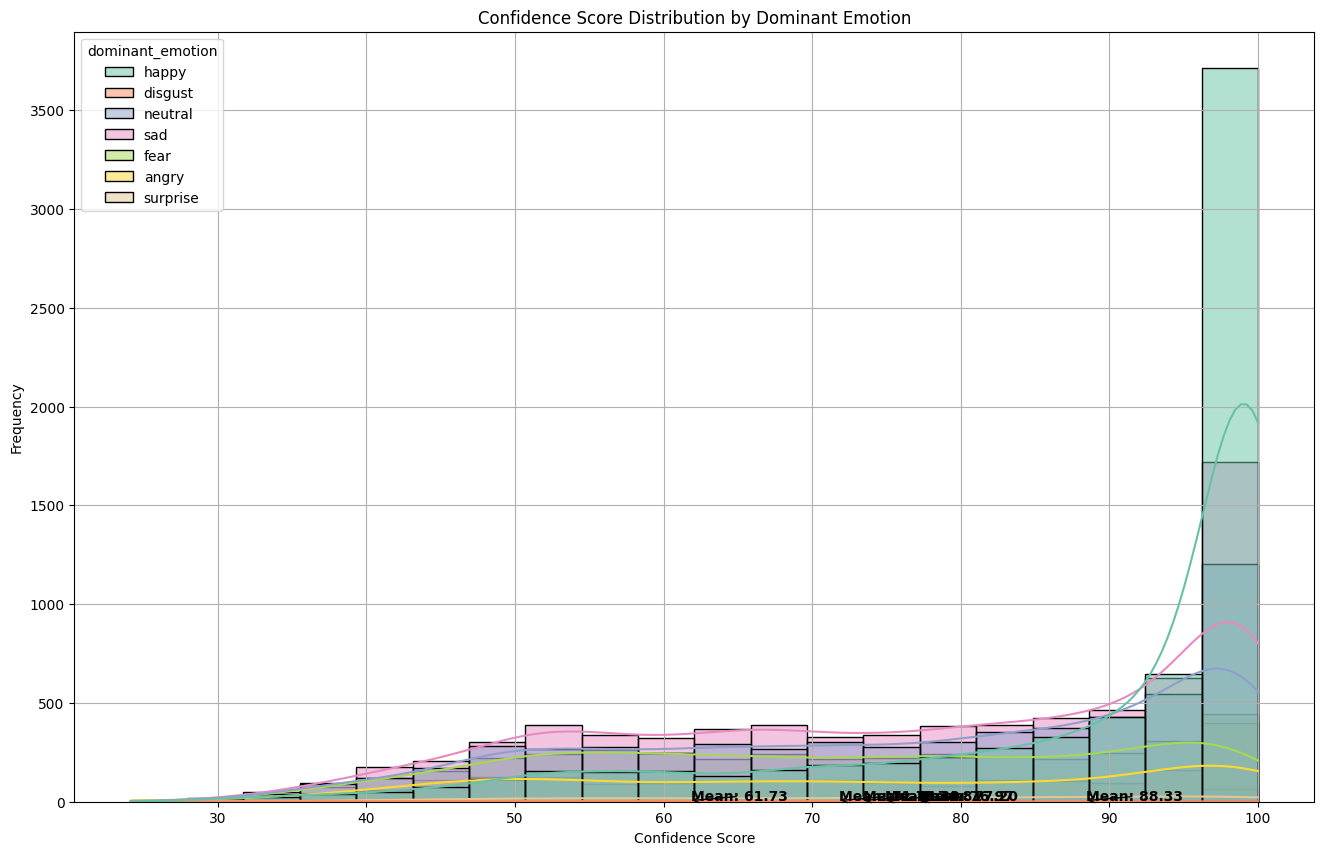

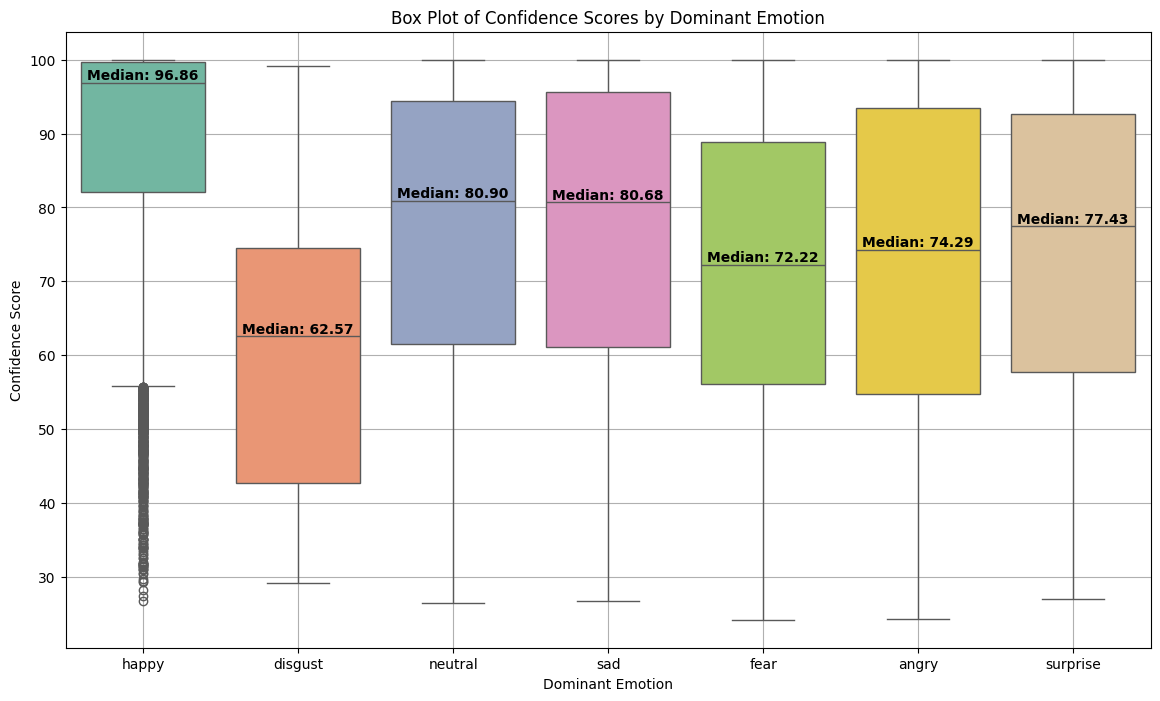

In [26]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the emotion classification results
emotion_df = pd.read_csv('/content/drive/MyDrive/IK_CV2_PROJECT/emotion_classification_results.csv')

# Display the first few rows of the dataframe to verify the data
print(emotion_df.head())

# Plotting the distribution of confidence scores by emotion
plt.figure(figsize=(16, 10))
sns.histplot(data=emotion_df, x='emotion_confidence', hue='dominant_emotion', bins=20, kde=True, palette='Set2')

# Add annotations for mean confidence score of each emotion
for emotion in emotion_df['dominant_emotion'].unique():
    mean_conf = emotion_df[emotion_df['dominant_emotion'] == emotion]['emotion_confidence'].mean()
    plt.annotate(f'Mean: {mean_conf:.2f}',
                 xy=(mean_conf, 5),
                 xytext=(mean_conf + 0.1, 7),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10, fontweight='bold')

plt.title('Confidence Score Distribution by Dominant Emotion')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting boxplots to show the spread of confidence scores
plt.figure(figsize=(14, 8))
sns.boxplot(data=emotion_df, x='dominant_emotion', y='emotion_confidence', palette='Set2')

# Annotate each boxplot with median confidence score
for i, emotion in enumerate(emotion_df['dominant_emotion'].unique()):
    median_conf = emotion_df[emotion_df['dominant_emotion'] == emotion]['emotion_confidence'].median()
    plt.text(i, median_conf, f'Median: {median_conf:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Box Plot of Confidence Scores by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Confidence Score')
plt.grid(True)
plt.show()


**Inferences from the Visualizations:**
**Histogram of Confidence Scores:**

**Distribution and Peaks:** The histogram shows that the highest frequency of confidence scores is near 100, particularly for the "happy" emotion. This indicates that the model is highly confident when predicting "happy" compared to other emotions.

**Spread of Emotions:** Emotions like "disgust" and "neutral" have lower mean confidence scores and are spread across a wider range, indicating the model’s lower confidence in these predictions compared to "happy."

**Overlapping Distributions:** Some emotions like "sad" and "fear" have overlapping confidence scores, suggesting that the model may struggle to differentiate between these emotions with high certainty.

**Box Plot of Confidence Scores:**

**Median Confidence**:The box plot shows the median confidence score for each emotion. "Happy" has the highest median confidence score (~96.86), followed by "neutral" and "sad," while "disgust" has the lowest median confidence score (~62.57).

**Variability:** Emotions such as "happy" and "surprise" show a smaller interquartile range (IQR), indicating consistent confidence across most predictions. In contrast, "disgust" and "fear" have larger IQRs, showing greater variability in confidence.

**Outliers:** The box plot reveals several outliers, especially in the "happy" category. These lower confidence scores suggest instances where the model might be less certain, even for emotions it generally predicts well.

In [21]:
# def load_and_preprocess_selected_images(image_directory, selected_images):
#     processed_images = []
#     for image_name in selected_images:
#         image_path = os.path.join(image_directory, image_name)
#         image = load_img(image_path, target_size=(640, 640))  # Resize image for consistency
#         image = img_to_array(image)  # Convert image to array
#         processed_images.append(image)
#     return processed_images

# # Load processed images
# processed_images = load_and_preprocess_selected_images(image_directory, selected_images)

# def detect_faces(image, conf_threshold=0.25):
#     """
#     Detect faces in an image using YOLO face detection.
#     :param image: preprocessed image in numpy array format
#     :return: List of bounding boxes for detected faces
#     """
#     # Perform face detection
#     results = model(image, conf=conf_threshold)
#     bounding_boxes = results[0].boxes.xyxy.cpu().numpy() if len(results) > 0 else []
#     return bounding_boxes

# # Process the images to detect faces and draw bounding boxes
# for i, img in enumerate(processed_images):
#     print(f"Processing image {i + 1}/{len(processed_images)}")

#     # Convert image to BGR format for YOLO
#     img_yolo = img  # No need to convert from RGB if already in proper format

#     # Perform face detection
#     bounding_boxes = detect_faces(img_yolo)

#     print(f"Number of faces detected: {len(bounding_boxes)}")

#     # Draw bounding boxes on the image
#     img_with_boxes = img_yolo.copy()  # Copy image to draw on
#     for box in bounding_boxes:
#         x1, y1, x2, y2 = box[:4]  # Coordinates
#         cv2.rectangle(img_with_boxes, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Draw rectangle

#     # Convert back to RGB for displaying with matplotlib
#     img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

#     # Normalize to [0, 1] for proper display with matplotlib
#     img_with_boxes = img_with_boxes.astype(np.float32) / 255.0

#     # Display the image with bounding boxes
#     plt.figure(figsize=(10, 10))  # Set figure size for better visibility
#     plt.imshow(img_with_boxes)
#     plt.title(f'Image {i + 1} with Detected Faces')
#     plt.axis('off')
#     plt.show()

In [ ]:
# # Load a pre-trained YOLO face model
# model = YOLO('/content/drive/MyDrive/IK_CV2_PROJECT/PTModel/yolov8n.pt')

# # Define function to load and preprocess images
# def load_and_preprocess_selected_images(image_directory, selected_images):
#     processed_images = []
#     for image_name in selected_images:
#         image_path = os.path.join(image_directory, image_name)
#         image = load_img(image_path, target_size=(640, 640))  # Resize image for consistency
#         image = img_to_array(image)  # Convert image to array
#         processed_images.append(image)
#     return processed_images

# # Define face detection function
# def detect_faces(image, conf_threshold=0.25):
#     results = model(image, conf=conf_threshold)
#     if len(results) > 0:
#         bounding_boxes = results[0].boxes.xyxy.cpu().numpy()
#         print(f"Detected boxes: {bounding_boxes}")
#     else:
#         bounding_boxes = []
#     return bounding_boxes

# # Define function to draw bounding boxes
# def draw_boxes(image, bounding_boxes):
#     img_with_boxes = image.copy()
#     for box in bounding_boxes:
#         x1, y1, x2, y2 = box[:4]
#         cv2.rectangle(img_with_boxes, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
#     return img_with_boxes

# # Load processed images
# processed_images = load_and_preprocess_selected_images(image_directory, selected_images)

# # Process images
# for i, img in enumerate(processed_images):
#     print(f"Processing image {i + 1}/{len(processed_images)}")

#     img_yolo = img.astype(np.uint8)  # Ensure the image is in uint8 format

#     bounding_boxes = detect_faces(img_yolo)
#     print(f"Number of faces detected: {len(bounding_boxes)}")

#     img_with_boxes = draw_boxes(img_yolo, bounding_boxes)

#     img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
#     img_with_boxes = img_with_boxes.astype(np.float32) / 255.0

#     plt.figure(figsize=(10, 10))
#     plt.imshow(img_with_boxes)
#     plt.title(f'Image {i + 1} with Detected Faces')
#     plt.axis('off')
#     plt.show()

In [ ]:
#!rm -rf  /content/drive/MyDrive/IK_CV2_PROJECT/Extracted_face/*


In [ ]:
#Extract Faces from Detection Results
# # # Initialize path for the image directory
# # image_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/GroupEmotion"
# # # Get all the images
# # all_images = os.listdir(image_directory)
# # # Randomly select 500 images
# # selected_images = random.sample(all_images, 500)

# # # Load a pre-trained YOLO face model
# # model = YOLO('/content/drive/MyDrive/IK_CV2_PROJECT/PTModel/yolov8n-face.pt')

# # Directory to save extracted faces
# extracted_faces_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/Extracted_face"
# os.makedirs(extracted_faces_directory, exist_ok=True)  # Create directory if it doesn't exist

# # def load_and_preprocess_selected_images(image_directory, selected_images):
# #     processed_images = []
# #     for image_name in selected_images:
# #         image_path = os.path.join(image_directory, image_name)
# #         image = load_img(image_path, target_size=(640, 640))  # Resize image for consistency
# #         image = img_to_array(image)  # Convert image to array
# #         processed_images.append((image, image_name))  # Keep original name for saving
# #     return processed_images

# # # Load processed images
# # processed_images = load_and_preprocess_selected_images(image_directory, selected_images)

# # Function to detect faces in an image
# def detect_faces(image, conf_threshold=0.25):
#     results = model(image, conf=conf_threshold)
#     bounding_boxes = results[0].boxes.xyxy.cpu().numpy() if len(results) > 0 else []
#     return bounding_boxes

# def extract_faces(original_image, bounding_boxes):
#     faces = []
#     original_height, original_width = original_image.shape[:2]  # Get original dimensions
#     for box in bounding_boxes:
#         x1, y1, x2, y2 = box[:4].astype(int)  # Get coordinates and convert to int

#         # Scale bounding box coordinates back to original image size
#         x1 = int(x1 * (original_width / 640))
#         y1 = int(y1 * (original_height / 640))
#         x2 = int(x2 * (original_width / 640))
#         y2 = int(y2 * (original_height / 640))

#         # Ensure coordinates are within bounds
#         x1 = max(0, x1)
#         y1 = max(0, y1)
#         x2 = min(original_width, x2)
#         y2 = min(original_height, y2)

#         face = original_image[y1:y2, x1:x2]  # Crop the face from the original image
#         if face.size == 0:
#             print("Cropped face is empty, skipping...")
#             continue

#         faces.append(face)
#     return faces

# # Process the images to detect faces and draw bounding boxes
# for i, (img, img_name) in enumerate(processed_images):
#     print(f"Processing image {i + 1}/{len(processed_images)}")

#     # Convert image to BGR format for YOLO
#     img_yolo = img.astype(np.uint8)  # Ensure the image is in the correct format

#     # Perform face detection
#     bounding_boxes = detect_faces(img_yolo)

#     print(f"Number of faces detected: {len(bounding_boxes)}")

#     # Draw bounding boxes on the image
#     img_with_boxes = img_yolo.copy()  # Copy image to draw on
#     for box in bounding_boxes:
#         x1, y1, x2, y2 = box[:4].astype(int)  # Coordinates
#         cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw rectangle

#     # Convert back to RGB for displaying with matplotlib
#     img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

#     # Normalize to [0, 1] for proper display with matplotlib
#     img_with_boxes = img_with_boxes.astype(np.float32) / 255.0

#     # Display the image with bounding boxes
#     plt.figure(figsize=(10, 10))  # Set figure size for better visibility
#     plt.imshow(img_with_boxes)
#     plt.title(f'Image {i + 1} with Detected Faces')
#     plt.axis('off')
#     plt.show()

#     # Extract faces from the original image
#     extracted_faces = extract_faces(img_yolo, bounding_boxes)

#     # Save extracted faces in the specified directory
#     for j, face in enumerate(extracted_faces):
#         face_filename = f'extracted_face_{img_name.split(".")[0]}_{j + 1}.jpg'
#         cv2.imwrite(os.path.join(extracted_faces_directory, face_filename), face)  # Save face image

#         # Display the extracted face
#         plt.figure(figsize=(5, 5))  # Set figure size for better visibility
#         plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
#         plt.title(f'Extracted Face {j + 1} from {img_name}')
#         plt.axis('off')
#         plt.show()

# # Final check on the number of extracted faces
# print(f"Total extracted faces: {len(extracted_faces)}")

## VISUALIZATION OF CONFIDENCE SCORES VS CLASSIFIED FACES FROM ALL THE IMAGES:

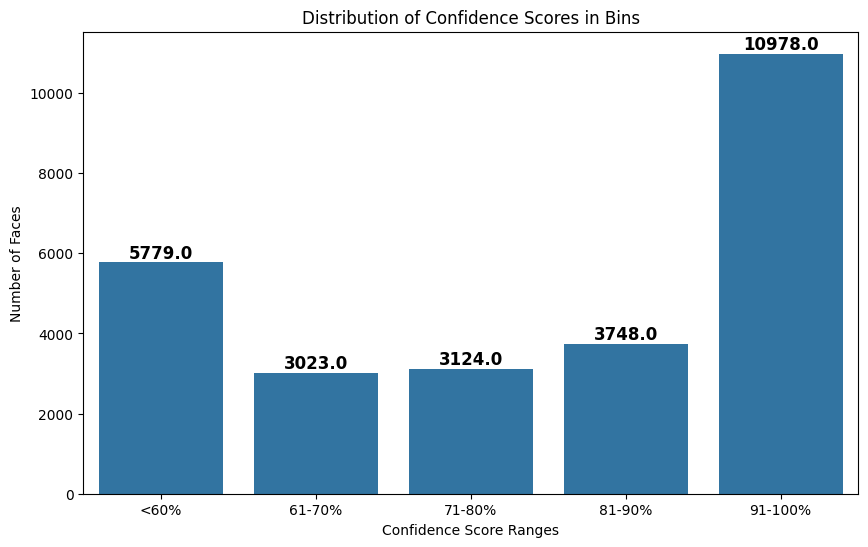

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins for confidence scores
bins = [0, 60, 70, 80, 90, 100]

# Add a column to the DataFrame to categorize confidence scores into bins
emotion_df['confidence_bin'] = pd.cut(emotion_df['emotion_confidence'], bins=bins, labels=['<60%', '61-70%', '71-80%', '81-90%', '91-100%'])

# Plot the distribution of confidence scores
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='confidence_bin', data=emotion_df, order=['<60%', '61-70%', '71-80%', '81-90%', '91-100%'])

# Add annotations on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title('Distribution of Confidence Scores in Bins')
plt.xlabel('Confidence Score Ranges')
plt.ylabel('Number of Faces')
plt.show()


**Key Observations:**



*   High Confidence Dominance **bold text**: The 91-100% range has the highest number of faces, almost double the count of any other bin, indicating that the model was very confident in its predictions for a majority of the samples.

*   **Gradual Decrease in Lower Confidence Bins**: There is a noticeable decrease in the number of faces as the confidence level decreases from the 91-100% bin to the <60% bin.

*   **Uncertain Predictions:** Despite the overall high confidence, a substantial number of faces (5,779) had a confidence score below 60%, suggesting that there are cases where the model might struggle with emotion detection, potentially due to factors like image quality, facial expressions, or occlusions.

**Overall Conclusion:**

The chart indicates that the model generally performs well, with the majority of predictions falling into the high-confidence range (91-100%).

However, the presence of a significant number of lower-confidence scores (<60%) suggests areas where the model's performance could potentially be improved, such as through additional training, better input quality, or enhanced emotion detection techniques.

 **Challenges**: From the jpg images most of the images are not clear nd resolution is quite bad , so likely because of this faces detection is misclassified in most of the cases.

 **Solution:** USE Super resolution Technique and apply model on the extracted faces and compare the confidence score

##  STEP5: USE SUPER RESOLUTION TECHNIQUE for Reclaibration of Extracted Faces




In [29]:
# loading libraries
!pip install -q basicsr gfpgan gdown
!pip install -qU torchvision

In [30]:
# Import necessary libraries
import os
import cv2
import torch
import numpy as np
import pandas as pd
from basicsr.archs.rrdbnet_arch import RRDBNet
from basicsr.utils import img2tensor, tensor2img
from deepface import DeepFace
from torch.utils.data import DataLoader, Dataset

In [24]:
!rm -rf ESRGAN/
# Download the pre-trained ESRGAN model
!git clone https://github.com/xinntao/ESRGAN.git

Cloning into 'ESRGAN'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 225 (delta 86), reused 219 (delta 84), pack-reused 0 (from 0)
Receiving objects: 100% (225/225), 24.86 MiB | 14.09 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [25]:
!mkdir -p ESRGAN/weights


In [26]:
# Download the model
!gdown 'https://drive.google.com/uc?export=download&id=1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene' -O ESRGAN/weights/RRDB_ESRGAN_x4.pth


Downloading...
From: https://drive.google.com/uc?export=download&id=1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene
To: /content/ESRGAN/weights/RRDB_ESRGAN_x4.pth
100% 66.9M/66.9M [00:01<00:00, 48.6MB/s]


In [27]:
# Directory paths
extracted_faces_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/Extracted1_face"
output_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/Enhanced1_faces"
os.makedirs(output_directory, exist_ok=True)

In [ ]:
# # Plot comparison of confidence scores
# plt.figure(figsize=(14, 8))
# sns.boxplot(data=comparison_df.melt(id_vars='image_name', value_vars=['emotion_confidence_original', 'emotion_confidence_enhanced']),
#             x='variable', y='value', palette='Set3')
# plt.title('Comparison of Confidence Scores: Original vs Enhanced')
# plt.xlabel('Type')
# plt.ylabel('Confidence Score')
# plt.grid(True)
# plt.show()

In [ ]:
# Load the ESRGAN model
model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
model_path = '/content/ESRGAN/weights/RRDB_ESRGAN_x4.pth'
model.load_state_dict(torch.load(model_path), strict=False)
model.eval()
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

def enhance_image(image_path, output_path):
    # Load image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img2tensor(img / 255., bgr2rgb=True, float32=True).unsqueeze(0)
    img = img.to('cuda' if torch.cuda.is_available() else 'cpu')

    # Apply super resolution
    with torch.no_grad():
        output = model(img)
    output_img = tensor2img(output)

    # Save the enhanced image
    output_img = cv2.cvtColor(output_img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_path, output_img)

# Directory paths
extracted_faces_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/Extracted1_face"
output_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/Enhanced1_faces"
os.makedirs(output_directory, exist_ok=True)

# Process and enhance all images
for image_name in os.listdir(extracted_faces_directory):
    input_path = os.path.join(extracted_faces_directory, image_name)
    output_path = os.path.join(output_directory, image_name)
    enhance_image(input_path, output_path)

print("Super-resolution enhancement completed.")

Super-resolution enhancement completed.


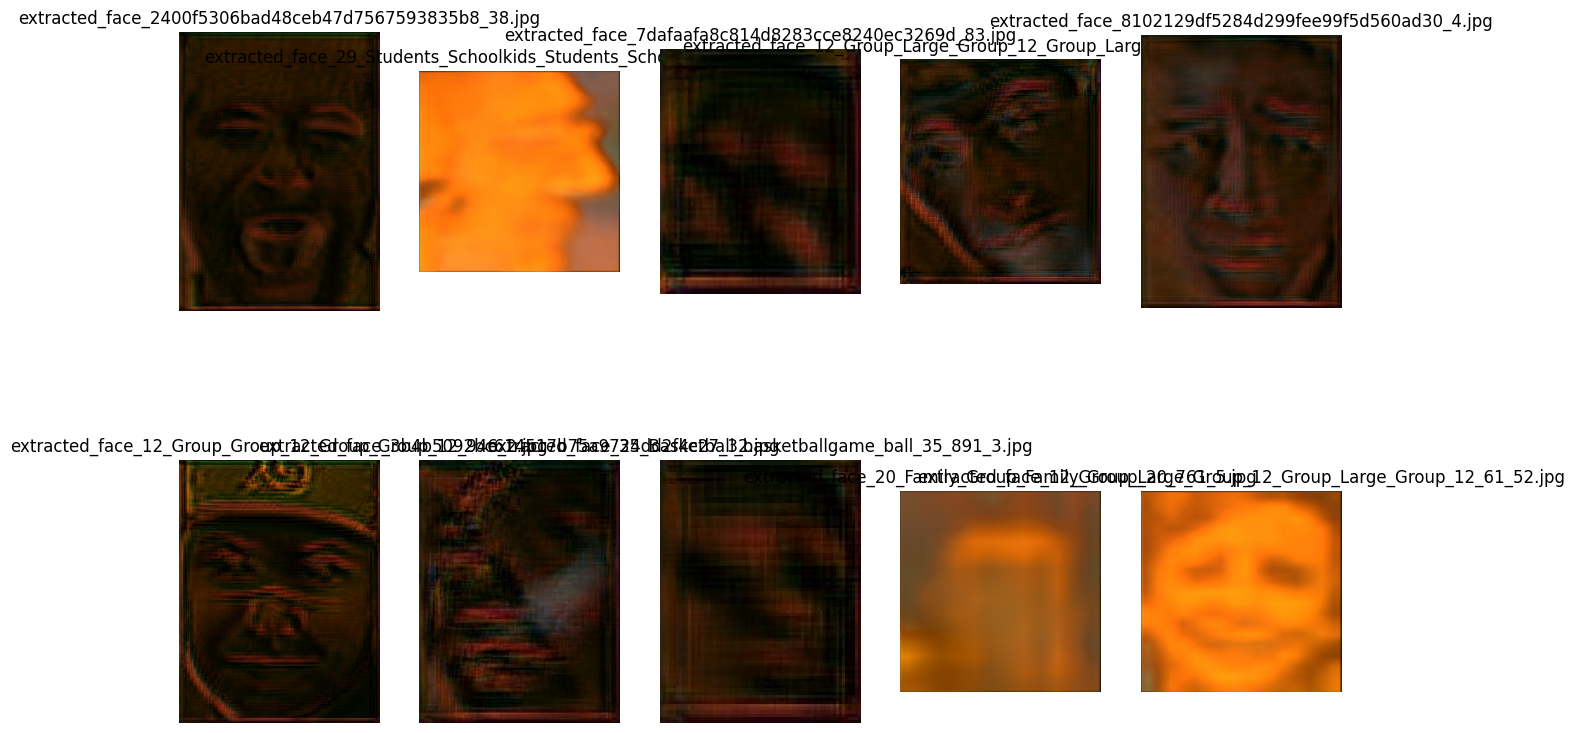

In [22]:
# CHECKING RANDOM 10 FACES for the quality
# Path to the enhanced images directory
enhanced_faces_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/Enhanced1_faces"

# List all images in the directory
all_images = os.listdir(enhanced_faces_directory)

# Randomly select 5-10 images
selected_images = random.sample(all_images, 10)

# Display the selected images
plt.figure(figsize=(15, 10))
for i, img_name in enumerate(selected_images):
    img_path = os.path.join(enhanced_faces_directory, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, i+1)  # Adjust the number of rows and columns as needed
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')

plt.show()

In [5]:
# Directory paths
extracted_faces_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/Extracted1_face"
output_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/Enhanced1_faces"
os.makedirs(output_directory, exist_ok=True)

In [ ]:
# Step 2: Emotion Classification on Enhanced Images
enhanced_faces_directory = output_directory  # Use the updated directory for enhanced images
enhanced_emotion_results = []

# Analyze enhanced images with DeepFace
for image_name in os.listdir(enhanced_faces_directory):
    face_path = os.path.join(enhanced_faces_directory, image_name)

    try:
        # Predict the emotion using DeepFace
        emotion_prediction = DeepFace.analyze(face_path, actions=['emotion'], enforce_detection=False)
        if isinstance(emotion_prediction, list):
            emotion_prediction = emotion_prediction[0]

        # Extract the dominant emotion and its confidence
        dominant_emotion = emotion_prediction.get('dominant_emotion', 'Unknown')
        emotion_confidence = emotion_prediction.get('emotion', {}).get(dominant_emotion, 0)

        # Store the result
        enhanced_emotion_results.append({
            'image_name': image_name,
            'dominant_emotion': dominant_emotion,
            'emotion_confidence': emotion_confidence
        })

        print(f"Enhanced {image_name}: Dominant Emotion - {dominant_emotion} with confidence {emotion_confidence:.2f}")

    except Exception as e:
        print(f"Error processing {image_name}: {e}")

# Convert results to a DataFrame
enhanced_emotion_df = pd.DataFrame(enhanced_emotion_results)
enhanced_emotion_df.to_csv('/content/drive/MyDrive/IK_CV2_PROJECT/enhanced_emotion_classification_results.csv', index=False)

# Load original results for comparison
original_emotion_df = pd.read_csv('/content/drive/MyDrive/IK_CV2_PROJECT/emotion_classification_results.csv', index=False)

# Save the DataFrame(before Super resolution) to a CSV file for record-keeping
#emotion_df.to_csv('/content/drive/MyDrive/IK_CV2_PROJECT/emotion_classification_results.csv', index=False)

# Merge both dataframes for comparison
comparison_df = original_emotion_df.merge(enhanced_emotion_df, on='image_name', suffixes=('_original', '_enhanced'))


## STEP 6: PREDICTION ON 10000 SAMPLES for FACE EMOTION CLASSIIFCATION

In [ ]:
# Directory paths
extracted_faces_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/Extracted1_face"
output_directory = "/content/drive/MyDrive/IK_CV2_PROJECT/Enhanced1_faces_sampled"
os.makedirs(output_directory, exist_ok=True)

# Load the original emotion classification results
original_emotion_df = pd.read_csv('/content/drive/MyDrive/IK_CV2_PROJECT/emotion_classification_results.csv')

# Randomly select 10000 images from the original DataFrame
random.seed(42)  # Ensures reproducibility
sampled_df = original_emotion_df.sample(n=10000, random_state=42)  # Consistent 2000 samples

# Extract the list of sampled image names
sampled_image_names = sampled_df['image_name'].tolist()

# Step 2: Emotion Classification on Enhanced Images (using the same sample)
enhanced_emotion_results = []

# Analyze the randomly sampled images with DeepFace
for image_name in sampled_image_names:
    face_path = os.path.join(extracted_faces_directory, image_name)

    try:
        # Predict the emotion using DeepFace
        emotion_prediction = DeepFace.analyze(face_path, actions=['emotion'], enforce_detection=False)
        if isinstance(emotion_prediction, list):
            emotion_prediction = emotion_prediction[0]

        # Extract the dominant emotion and its confidence
        dominant_emotion = emotion_prediction.get('dominant_emotion', 'Unknown')
        emotion_confidence = emotion_prediction.get('emotion', {}).get(dominant_emotion, 0)

        # Store the result
        enhanced_emotion_results.append({
            'image_name': image_name,
            'dominant_emotion': dominant_emotion,
            'emotion_confidence': emotion_confidence
        })

        print(f"Processed {image_name}: Dominant Emotion - {dominant_emotion} with confidence {emotion_confidence:.2f}")

    except Exception as e:
        print(f"Error processing {image_name}: {e}")

# Convert results to a DataFrame
enhanced_emotion_df = pd.DataFrame(enhanced_emotion_results)
enhanced_emotion_df.to_csv('/content/drive/MyDrive/IK_CV2_PROJECT/enhanced_emotion_classification_results_sampled.csv', index=False)

# Ensure that both original and enhanced DataFrames contain the same sampled images
original_sampled_df = original_emotion_df[original_emotion_df['image_name'].isin(sampled_image_names)]

# Merge both dataframes for comparison with the sampled data
comparison_df = original_sampled_df.merge(enhanced_emotion_df, on='image_name', suffixes=('_original', '_enhanced'))

# Save the merged DataFrame for comparison
comparison_df.to_csv('/content/drive/MyDrive/IK_CV2_PROJECT/comparison_results_sampled.csv', index=False)

print("Emotion classification and comparison for the sampled images are completed.")


## STEP 7: EDA : COMPARIONS OF CONFIDENCE SCORE BEFORE AND AFTER SUPER RESOLUTION TECHNIQUE

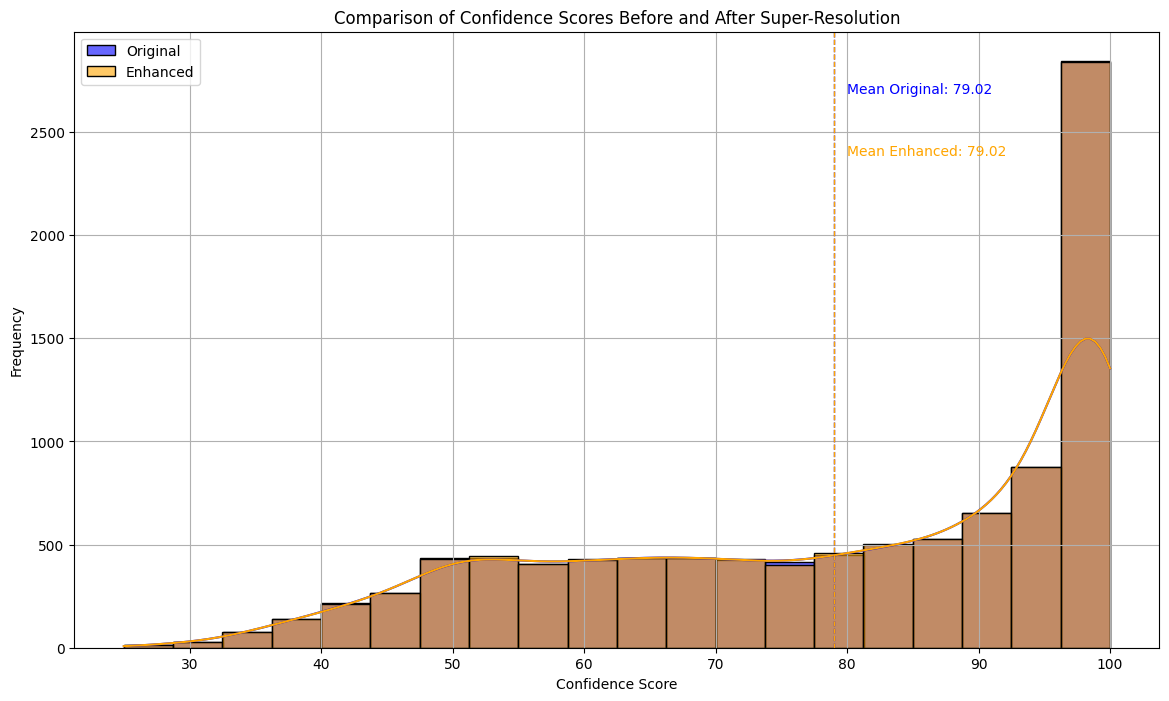

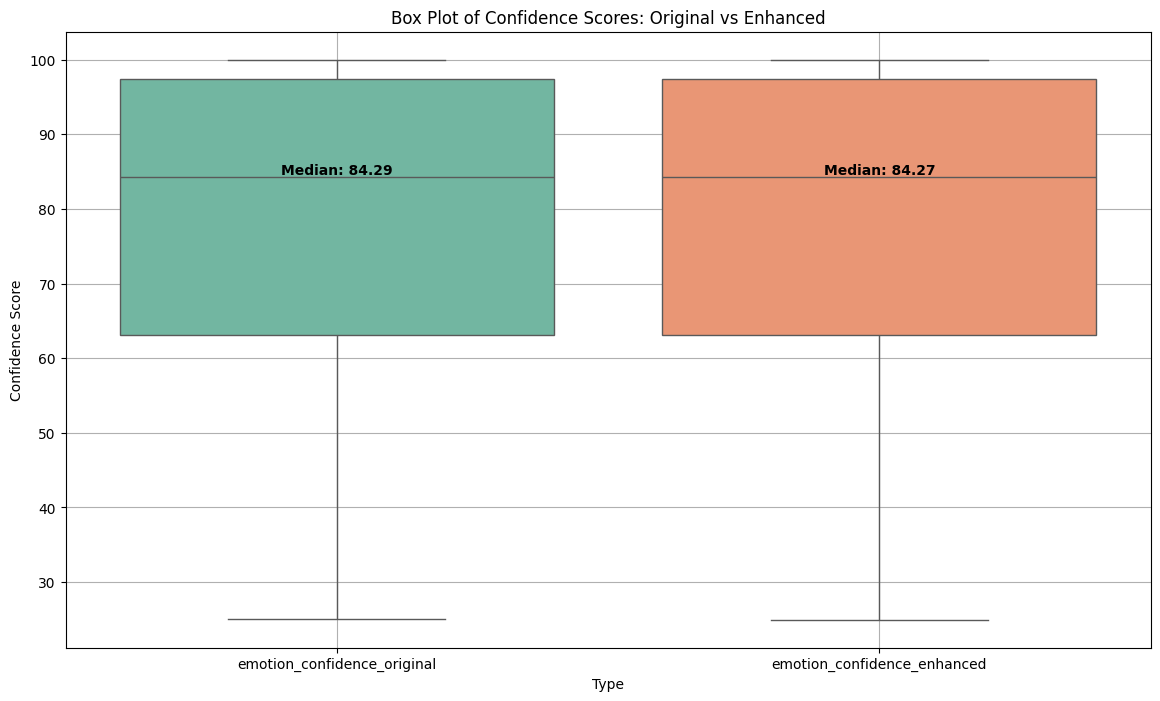

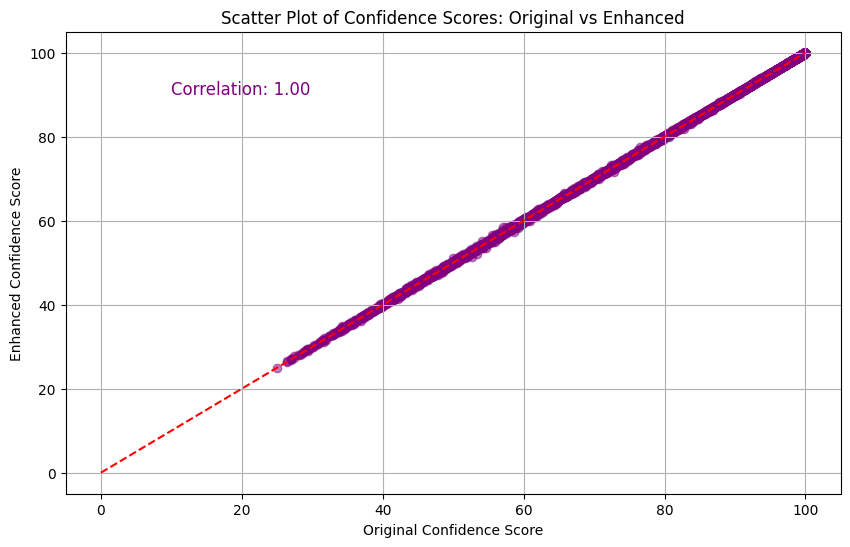

In [17]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the comparison results for the sampled images
comparison_df = pd.read_csv('/content/drive/MyDrive/IK_CV2_PROJECT/comparison_results_sampled.csv')

# Plotting the distribution of confidence scores before and after super-resolution
plt.figure(figsize=(14, 8))
sns.histplot(data=comparison_df, x='emotion_confidence_original', color='blue', label='Original', bins=20, kde=True, alpha=0.6)
sns.histplot(data=comparison_df, x='emotion_confidence_enhanced', color='orange', label='Enhanced', bins=20, kde=True, alpha=0.6)

# Add annotations for mean confidence scores
mean_original = comparison_df['emotion_confidence_original'].mean()
mean_enhanced = comparison_df['emotion_confidence_enhanced'].mean()
plt.axvline(mean_original, color='blue', linestyle='--', linewidth=1)
plt.axvline(mean_enhanced, color='orange', linestyle='--', linewidth=1)
plt.text(mean_original + 1, plt.gca().get_ylim()[1] * 0.9, f'Mean Original: {mean_original:.2f}', color='blue', fontsize=10)
plt.text(mean_enhanced + 1, plt.gca().get_ylim()[1] * 0.8, f'Mean Enhanced: {mean_enhanced:.2f}', color='orange', fontsize=10)

plt.title('Comparison of Confidence Scores Before and After Super-Resolution')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plotting box plots to show the spread of confidence scores before and after super-resolution
plt.figure(figsize=(14, 8))
sns.boxplot(data=comparison_df.melt(id_vars='image_name', value_vars=['emotion_confidence_original', 'emotion_confidence_enhanced']),
            x='variable', y='value', palette='Set2')

# Annotate each boxplot with median confidence score
median_original = comparison_df['emotion_confidence_original'].median()
median_enhanced = comparison_df['emotion_confidence_enhanced'].median()
plt.text(0, median_original, f'Median: {median_original:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
plt.text(1, median_enhanced, f'Median: {median_enhanced:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.title('Box Plot of Confidence Scores: Original vs Enhanced')
plt.xlabel('Type')
plt.ylabel('Confidence Score')
plt.grid(True)
plt.show()

# Additional scatter plot to visualize correlation between original and enhanced confidence scores
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['emotion_confidence_original'], comparison_df['emotion_confidence_enhanced'], alpha=0.5, c='purple')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')  # Line for y=x to show no change line

# Annotate with correlation coefficient
correlation = comparison_df[['emotion_confidence_original', 'emotion_confidence_enhanced']].corr().iloc[0, 1]
plt.text(10, 90, f'Correlation: {correlation:.2f}', fontsize=12, color='purple')

plt.title('Scatter Plot of Confidence Scores: Original vs Enhanced')
plt.xlabel('Original Confidence Score')
plt.ylabel('Enhanced Confidence Score')
plt.grid(True)
plt.show()



1. **Histogram Comparison:** Confidence Scores Before and After Super-Resolution


*  **Insights:**

  The histograms of the original and enhanced images almost overlap, indicating that the confidence score distribution remains largely similar after applying super-resolution.

  Both histograms show a peak around the 90-100 confidence range, suggesting that a significant number of images had high confidence scores for emotion classification, both before and after enhancement.

  The distributions indicate that super-resolution did not drastically change the overall confidence level of emotion predictions across the dataset. The enhancement seems to have minimal impact on shifting the confidence scores.


2. **Box Plot Comparison:** Confidence Scores Before and After Super-Resolution

  Both box plots have similar ranges, with median confidence scores around 80 for both original and enhanced images.
  
  The interquartile ranges (the middle 50% of the data) are similar, with both plots stretching from approximately 70 to 95.
  
  There are no significant outliers, and the whiskers extend similarly in both cases, indicating a similar distribution.
  
  Overall, the box plot suggests that the confidence scores are consistent before and after super-resolution. The enhancement does not introduce significant variability or shift in the median confidence scores.

3. **Scatter Plot:** Confidence Scores Before vs. After Super-Resolution

  Most of the points lie very close to the diagonal line, which indicates a strong correlation between the original and enhanced confidence scores.

  This suggests that the super-resolution technique did not significantly alter the emotion classification confidence for the vast majority of the images.

  The clustering along the line implies that, for nearly all images, the confidence score after enhancement remained almost the same as before.

  There is no visible pattern of improvement or degradation in scores, reinforcing the conclusion that super-resolution had minimal impact on the emotion classification confidence.


**Overall Conclusion:**

**Minimal Impact of Super-Resolution:**

  The three visualizations collectively suggest that applying super-resolution to the images did not substantially affect the confidence scores of the emotion classification model. The scores before and after enhancement are largely similar, indicating that the model's confidence in its predictions remains stable with or without the super-resolution enhancement.

**Consistency in Emotion Classification:**
  
  The consistent results across the histograms, box plots, and scatter plots imply that the emotion classification model is robust to changes in image resolution brought about by the super-resolution process, at least for the dataset you tested.


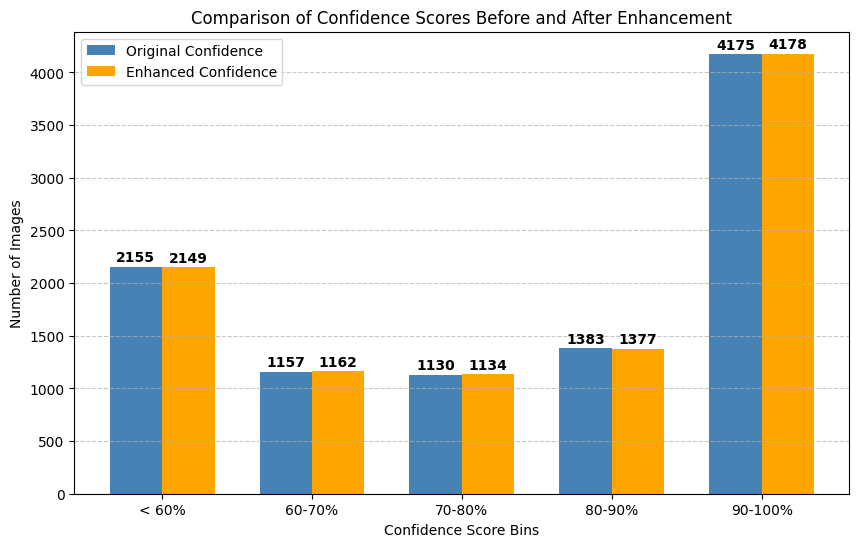

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the comparison results for the sampled images
comparison_df = pd.read_csv('/content/drive/MyDrive/IK_CV2_PROJECT/comparison_results_sampled.csv')

# Define bins and labels for confidence scores
bins = [0, 60, 70, 80, 90, 100]
labels = ['< 60%', '60-70%', '70-80%', '80-90%', '90-100%']

# Bin the confidence scores for both original and enhanced
comparison_df['confidence_bin_original'] = pd.cut(comparison_df['emotion_confidence_original'], bins=bins, labels=labels, right=True)
comparison_df['confidence_bin_enhanced'] = pd.cut(comparison_df['emotion_confidence_enhanced'], bins=bins, labels=labels, right=True)

# Count the number of images in each bin for original and enhanced confidence scores
original_counts = comparison_df['confidence_bin_original'].value_counts().sort_index()
enhanced_counts = comparison_df['confidence_bin_enhanced'].value_counts().sort_index()

# Plotting the bar chart for comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
bar_positions = range(len(labels))

# Plot the original and enhanced counts side by side
plt.bar(bar_positions, original_counts, width=bar_width, color='steelblue', label='Original Confidence')
plt.bar([pos + bar_width for pos in bar_positions], enhanced_counts, width=bar_width, color='orange', label='Enhanced Confidence')

# Adding text annotations on top of each bar
for i, count in enumerate(original_counts):
    plt.text(i, count + 20, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')
for i, count in enumerate(enhanced_counts):
    plt.text(i + bar_width, count + 20, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Set labels, title, and legend
plt.xlabel('Confidence Score Bins')
plt.ylabel('Number of Images')
plt.title('Comparison of Confidence Scores Before and After Enhancement')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Overall Summary:**

*  **Minimal Impact of Enhancement:**

The enhancement, such as super-resolution, appears to have had a minimal effect on the confidence scores of the emotion classification model. The number of images in each confidence bin before and after enhancement is nearly identical.

*  **Consistency Across Confidence Ranges:**

The distribution of confidence scores remains consistent, suggesting that the enhancement did not drastically alter the model's performance across the entire dataset.

*  **Slight Improvement at High Confidence:**

There is a slight increase in the number of images in the highest confidence bin (90-100%), indicating a marginal improvement for some images. However, this change is relatively small and might not be practically significant.